In [1]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [2]:
nat_change = pd.read_csv("data/lifeanddeath.csv",sep=";",decimal=",",encoding="utf8")

In [3]:
nat_change["Buurten"] = nat_change["Buurten"].str.split()

In [4]:
nat_change["Buurtcode"] = [item[0] for item in nat_change["Buurten"]]

In [5]:
nat_change = nat_change.set_index("Buurtcode").drop(index="Onbekend", columns="Buurten").rename(columns={'Natuurlijk verloop|1996':'1996', 'Natuurlijk verloop|1997':'1997',
       'Natuurlijk verloop|1998':'1998', 'Natuurlijk verloop|1999':'1999',
       'Natuurlijk verloop|2000':'2000', 'Natuurlijk verloop|2001':'2001',
       'Natuurlijk verloop|2002':'2002', 'Natuurlijk verloop|2003':'2003',
       'Natuurlijk verloop|2004':'2004', 'Natuurlijk verloop|2005':'2005',
       'Natuurlijk verloop|2006':'2006', 'Natuurlijk verloop|2007':'2007',
       'Natuurlijk verloop|2008':'2008', 'Natuurlijk verloop|2009':'2009',
       'Natuurlijk verloop|2010':'2010', 'Natuurlijk verloop|2011':'2011',
       'Natuurlijk verloop|2012':'2012', 'Natuurlijk verloop|2013':'2013',
       'Natuurlijk verloop|2014':'2014', 'Natuurlijk verloop|2015':'2015',
       'Natuurlijk verloop|2016':'2016', 'Natuurlijk verloop|2017':'2017',
       'Natuurlijk verloop|2018':'2018'}).replace('-',0).fillna(0)

In [6]:
nat_change = nat_change.astype(float)

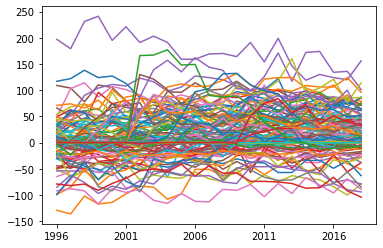

In [7]:
for i in nat_change.index:
    nat_change.loc[i].plot()

In [8]:
def calc_2020 (row):
    x = nat_change.columns.astype(float)
    y =  nat_change.loc[row]
    model = np.polyfit(x, y, 1)
    predict = np.poly1d(model)
    return predict(2020)

In [9]:
nat_change["2020"] = 0

In [10]:
for row in nat_change.index:
    nat_change["2020"].loc[row] = calc_2020(row)

C:\Users\joche\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
natural_change = round(nat_change["2020"],1)

In [196]:
natural_change.to_csv("output/natural_change.csv")

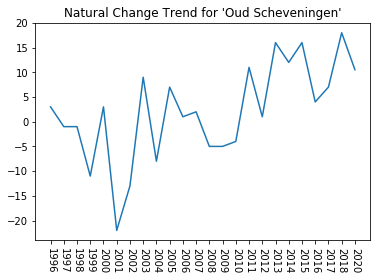

In [23]:
plt.plot(nat_change.loc["01"])
plt.xticks(rotation=-90)
plt.title("Natural Change Trend for 'Oud Scheveningen'")
plt.show()